In [26]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Counterfactuals I

An example from Peters et al. (2017). 

Different mechanisms leading to the same observational distribution.

Let:

* $N_1 \sim Ber(.5)$ 

* $N_2 \sim Ber(.5)$ 

* $N_3 \sim U(\{0, 1, 2\})$ 

We have two SCMs:

In [131]:
class SCM:
    
    def __init__(self, scm_type):
        self.n_1 = stats.bernoulli(.5)
        self.n_2 = stats.bernoulli(.5)
        self.n_3 = stats.randint(0, 3)
        
        if scm_type not in (1, 2):
            raise AttributeError(f'SCM {scm_type} not defined.')
        
        self.scm_type = scm_type
        
        
    def get_n_3_term(self, n_3):
        
        if self.scm_type == 1:
            n_3_term = n_3
        elif self.scm_type == 2:
            n_3_term = 2 - n_3
            
        return n_3_term

        
    def sample(self, n=100):
        samples = []
        x_1 = self.n_1.rvs(n)
        x_2 = self.n_2.rvs(n)
        n_3 = self.n_3.rvs(n)
        
        n_3_term = self.get_n_3_term(n_3)
   
        x_3 = ((n_3 > 0) * x_1 + (n_3 == 0) * x_2) + n_3_term * (x_1 == x_2)
        
        return x_3
    
    
    def intervene(self, intervention_dict, n=100):
        
        x_1_intervened = x_2_intervened = False
        
        for k, v in intervention_dict.items():
            
            if k == 'x_1':
                x_1 = np.ones(n) * v
                x_1_intervened = True
                
            if k == 'x_2':
                x_2 = np.ones(n) * v
                x_2_intervened = True
                
            if k not in ['x_1', 'x_2']:
                raise Warning(f'Unknown paramenter `{k}`.')
                
        if not x_1_intervened:
            x_1 = self.n_1.rvs(n)
        
        if not x_2_intervened:
            x_2 = self.n_2.rvs(n)
                
        n_3 = self.n_3.rvs(n)
        
        n_3_term = self.get_n_3_term(n_3)
   
        x_3 = ((n_3 > 0) * x_1 + (n_3 == 0) * x_2) + n_3_term * (x_1 == x_2)
    
        return x_3

In [132]:
scm_1 = SCM(1)
scm_2 = SCM(2)

In [133]:
scm_1_sample = scm_1.sample(10000)
scm_2_sample = scm_2.sample(10000)

scm_1_int_x_1_1 = scm_1.intervene({'x_1': 1}, n=10000)
scm_2_int_x_1_1 = scm_2.intervene({'x_1': 1}, n=10000)

scm_1_int_x_2_1 = scm_1.intervene({'x_2': 1}, n=10000)
scm_2_int_x_2_1 = scm_2.intervene({'x_2': 1}, n=10000)

scm_1_int_x_1_0 = scm_1.intervene({'x_1': 0}, n=10000)
scm_2_int_x_1_0 = scm_2.intervene({'x_1': 0}, n=10000)

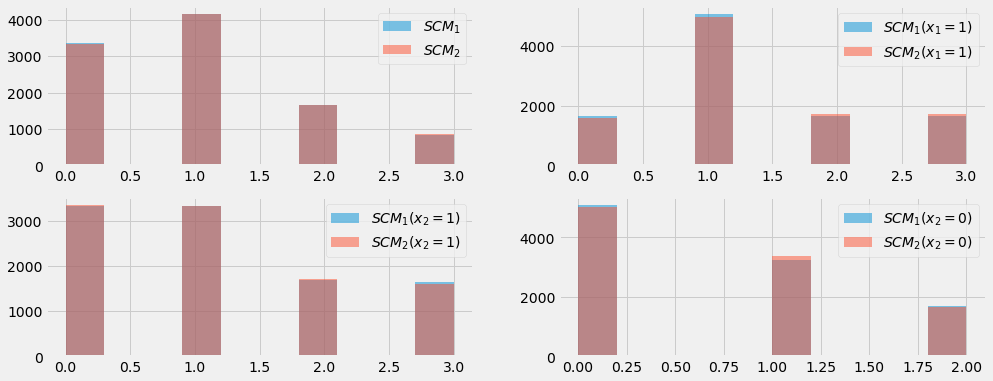

In [134]:
plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.hist(scm_1_sample, label='$SCM_1$', alpha=.5)
plt.hist(scm_2_sample, label='$SCM_2$', alpha=.5)
plt.legend()

plt.subplot(222)
plt.hist(scm_1_int_x_1_1, label='$SCM_1(x_1 = 1)$', alpha=.5)
plt.hist(scm_2_int_x_1_1, label='$SCM_2(x_1 = 1)$', alpha=.5)
plt.legend()

plt.subplot(223)
plt.hist(scm_1_int_x_2_1, label='$SCM_1(x_2 = 1)$', alpha=.5)
plt.hist(scm_2_int_x_2_1, label='$SCM_2(x_2 = 1)$', alpha=.5)
plt.legend()

plt.subplot(224)
plt.hist(scm_1_int_x_1_0, label='$SCM_1(x_2 = 0)$', alpha=.5)
plt.hist(scm_2_int_x_1_0, label='$SCM_2(x_2 = 0)$', alpha=.5)
plt.legend()

plt.show()